In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


%matplotlib inline

In [2]:
df = pd.read_csv('smoke_detection.csv')

In [3]:
df.isna().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [4]:
df.dtypes

Unnamed: 0          int64
UTC                 int64
Temperature[C]    float64
Humidity[%]       float64
TVOC[ppb]           int64
eCO2[ppm]           int64
Raw H2              int64
Raw Ethanol         int64
Pressure[hPa]     float64
PM1.0             float64
PM2.5             float64
NC0.5             float64
NC1.0             float64
NC2.5             float64
CNT                 int64
Fire Alarm          int64
dtype: object

In [5]:
len(df)

62630

In [6]:
df.head(4)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0


In [7]:
df = df.drop(['Unnamed: 0','UTC','CNT','PM1.0','PM2.5','NC0.5','NC1.0','NC2.5'], axis=1)

In [8]:
df['Fire Alarm'].value_counts()

Fire Alarm
1    44757
0    17873
Name: count, dtype: int64

C:\Users\aunur\AppData\Local\Temp\ipykernel_31164\793290817.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


array([[<AxesSubplot: title={'center': 'Temperature[C]'}>,
        <AxesSubplot: title={'center': 'Humidity[%]'}>,
        <AxesSubplot: title={'center': 'TVOC[ppb]'}>],
       [<AxesSubplot: title={'center': 'eCO2[ppm]'}>,
        <AxesSubplot: title={'center': 'Raw H2'}>,
        <AxesSubplot: title={'center': 'Raw Ethanol'}>],
       [<AxesSubplot: title={'center': 'Pressure[hPa]'}>,
        <AxesSubplot: title={'center': 'Fire Alarm'}>, <AxesSubplot: >]],
      dtype=object)

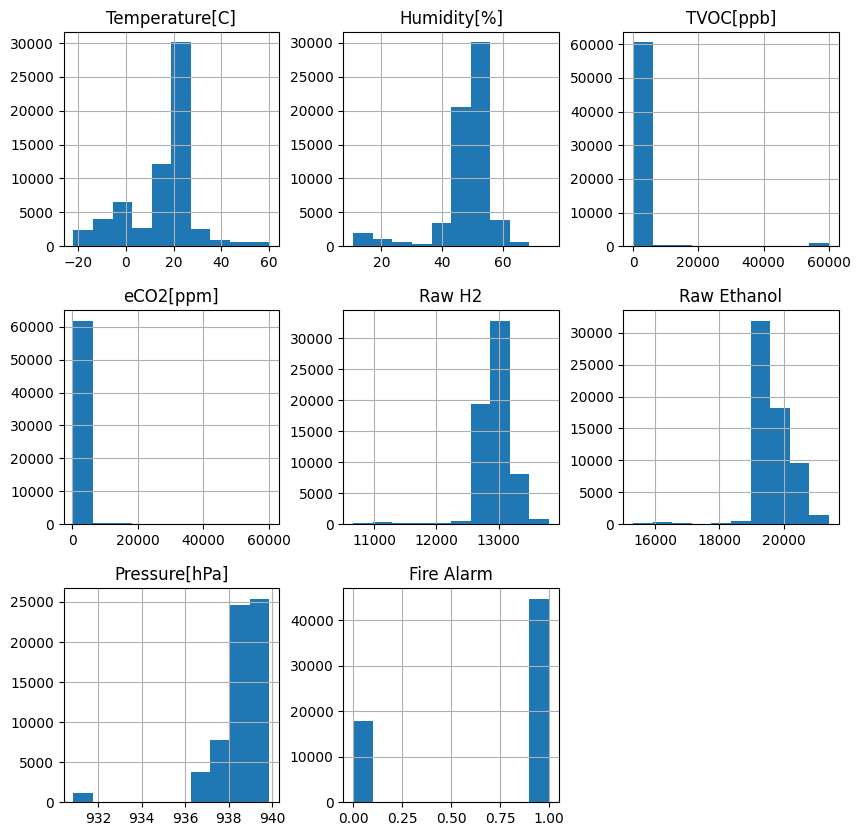

In [9]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.hist(ax=ax)

<AxesSubplot: >

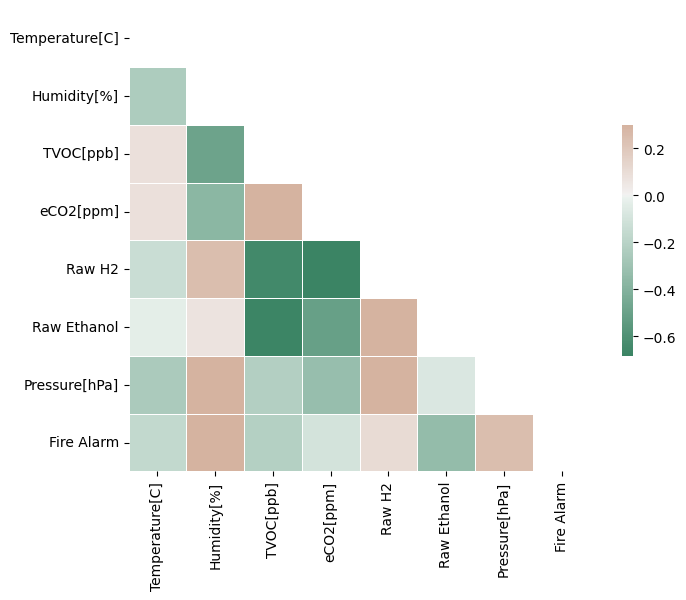

In [10]:
corr2 = df.corr()

mask = np.triu(np.ones_like(corr2, dtype=bool))
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(150, 30, as_cmap=True)
sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
dfy = df.pop('Fire Alarm')
dfy = pd.DataFrame(dfy, columns=['Fire Alarm'])

In [12]:
xtrain, xval, ytrain, yval = train_test_split(df, dfy, test_size=0.2, shuffle=True, random_state=42, stratify=dfy)

In [13]:
sc = StandardScaler()
sc.fit(xtrain)
xtrainsc = sc.transform(xtrain)
xvalsc = sc.transform(xval)

In [14]:
rf = RandomForestClassifier()
rf.fit(xtrainsc, ytrain.to_numpy().ravel())

RandomForestClassifier()

In [15]:
ypred = rf.predict(xvalsc)

In [16]:
print(accuracy_score(yval, ypred))

1.0


In [17]:
print(confusion_matrix(yval, ypred))

[[3575    0]
 [   0 8951]]


In [18]:
print(classification_report(yval, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      1.00      1.00      8951

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



<BarContainer object of 7 artists>

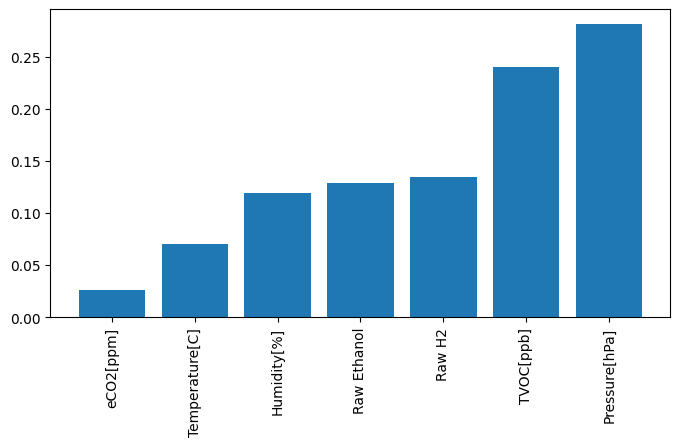

In [19]:
sorted_idx = rf.feature_importances_.argsort()
rf.feature_importances_[sorted_idx]


plt.figure(figsize=(8,4))
plt.xticks(rotation = 90)
plt.bar(xtrain.columns[sorted_idx], rf.feature_importances_[sorted_idx])

In [20]:
joblib.dump(rf, './smoke-detection-rf.joblib')

['./smoke-detection-rf.joblib']

In [21]:
joblib.dump(sc, './standardscaler.joblib')

['./standardscaler.joblib']

In [22]:
SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True